In [1]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.preprocessing import MinMaxScaler

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [3]:
# dimensionality of input and latent encoded representations
input_dim = (32,32,3)

input_img = Input(shape=input_dim)

# Convolutional layer
cl1 = Conv2D(64, (9,9), strides=(2,2), input_shape=input_dim,
             activation='relu')(input_img)

# Pooling and Batch normalization
pl2 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(cl1)
bnl3 = BatchNormalization()(pl2)

# Add second layer of convolutional layer
cl4 = Conv2D(123, (3,3), strides=(1,1),
             activation='relu')(bnl3)
pl5 = MaxPooling2D(pool_size=(2,2))(cl4)
bnl6 = BatchNormalization()(pl5)

# FLattening for compatibility
fl7 = Flatten()(bnl6)

# Denser layers + Dropout
dol8 = Dropout(0.5)(fl7)
dl9 = Dense(units=256, activation='relu')(dol8)
dol10 = Dropout(0.2)(dl9)
dl11 = Dense(units=64, activation='relu')(dol10)
dol12 = Dropout(0.)(dl11)
output = Dense(units=10, activation='sigmoid')(dol12)

classifier = Model(input_img, output)

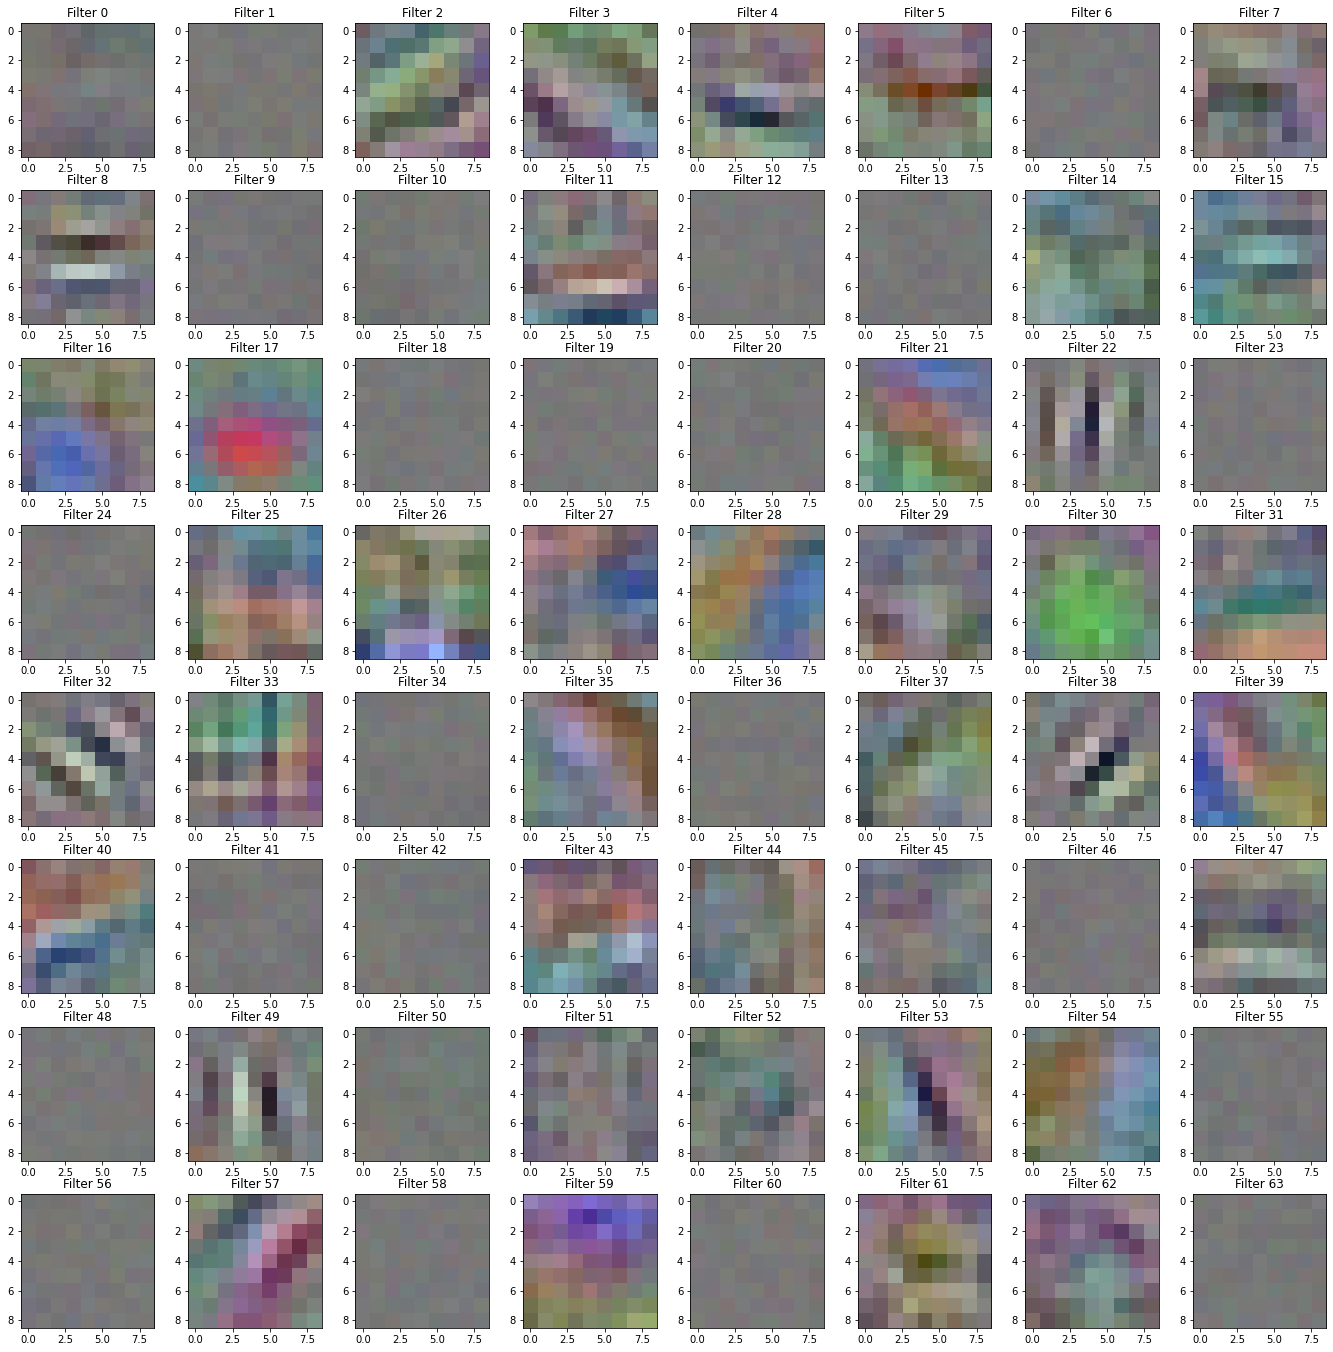

In [6]:
classifier.load_weights("../cnn.hdf5")
cnnl1 = classifier.layers[1].name
W = classifier.get_layer(name=cnnl1).get_weights()[0]
wshape = W.shape
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
    h = np.reshape(W[:,:,:,i], (9,9,3))
    axs[i].imshow(h)
    axs[i].set_title('Filter ' + str(i))

In [8]:
wshape

(9, 9, 3, 64)